In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns


LOADING DATASETS

In [2]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [4]:
merged = pd.merge(transactions, customers, on='CustomerID', how='inner')

FEATURE ENGINEERING

In [5]:
customer_transactions = merged.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    avg_spent=('TotalValue', 'mean'),
    purchase_count=('TransactionID', 'count')
).reset_index()

In [6]:
# Merge aggregated data with customer profile
customer_data = pd.merge(customer_transactions, customers, on='CustomerID', how='inner')

In [7]:
le = LabelEncoder()
customer_data['Region'] = le.fit_transform(customer_data['Region'])

In [8]:
features = customer_data[['total_spent', 'avg_spent', 'purchase_count', 'Region']]

In [9]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

CLUSTERING USING K-MEANS

In [10]:
k_values = range(2, 11)
db_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(features_scaled)
    db_index = davies_bouldin_score(features_scaled, labels)
    db_scores.append(db_index)

C:\Users\anshu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\anshu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anshu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\anshu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [11]:
optimal_k = k_values[np.argmin(db_scores)]
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(features_scaled)

C:\Users\anshu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\anshu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


VISUALISATION

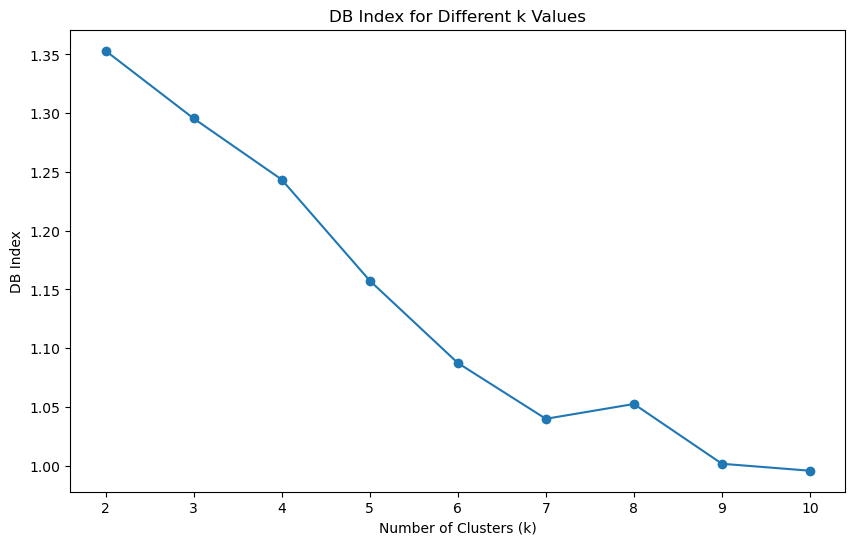

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, db_scores, marker='o')
plt.title('DB Index for Different k Values')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('DB Index')
plt.xticks(k_values)
plt.show()

Cluster visualization using pairplot

C:\Users\anshu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


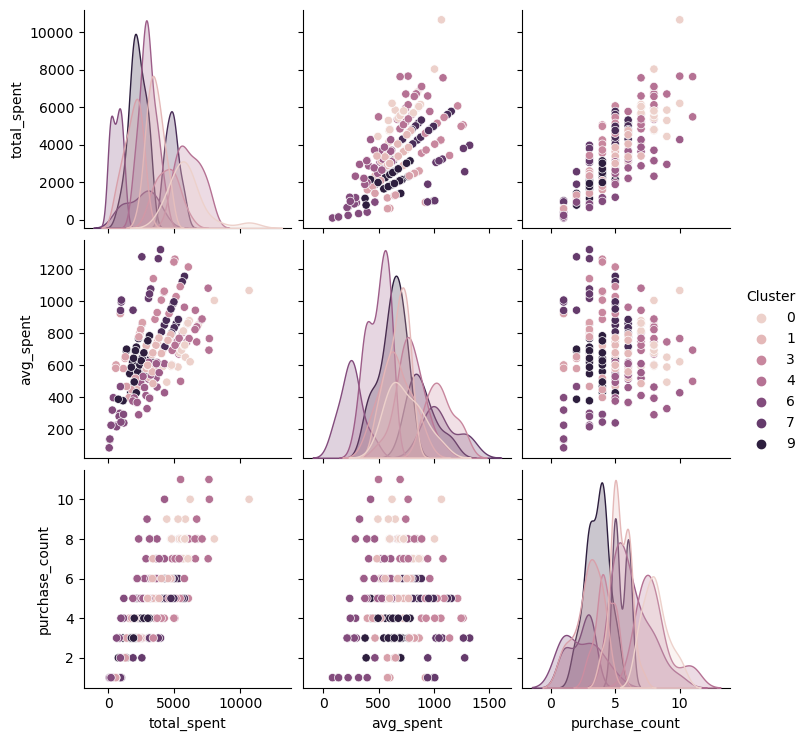

In [16]:
sns.pairplot(customer_data, hue='Cluster', vars=['total_spent', 'avg_spent', 'purchase_count'])
plt.show()


In [17]:
customer_data.to_csv('Customer_Clustering_Results.csv', index=False)

In [18]:
print(f"Optimal number of clusters: {optimal_k}")
print(f"DB Index for optimal clusters: {min(db_scores)}")

Optimal number of clusters: 10
DB Index for optimal clusters: 0.9957526812503528
